<a href="https://colab.research.google.com/github/JasminAcostaMendez26/Estad-stica-Verano/blob/main/PRACTICA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/JasminAcostaMendez26/Estad-stica-Verano/refs/heads/main/Salary_dataset.csv")
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


    Unnamed: 0  YearsExperience    Salary
0            0              1.2   39344.0
1            1              1.4   46206.0
2            2              1.6   37732.0
3            3              2.1   43526.0
4            4              2.3   39892.0
5            5              3.0   56643.0
6            6              3.1   60151.0
7            7              3.3   54446.0
8            8              3.3   64446.0
9            9              3.8   57190.0
10          10              4.0   63219.0
11          11              4.1   55795.0
12          12              4.1   56958.0
13          13              4.2   57082.0
14          14              4.6   61112.0
15          15              5.0   67939.0
16          16              5.2   66030.0
17          17              5.4   83089.0
18          18              6.0   81364.0
19          19              6.1   93941.0
20          20              6.9   91739.0
21          21              7.2   98274.0
22          22              8.0  1

,df,sum_sq,mean_sq,F,PR(>F)
Salary,1.0,223.501695,223.501695,622.507203,1.143068e-20
Residual,28.0,10.052972,0.359035,NaN,NaN


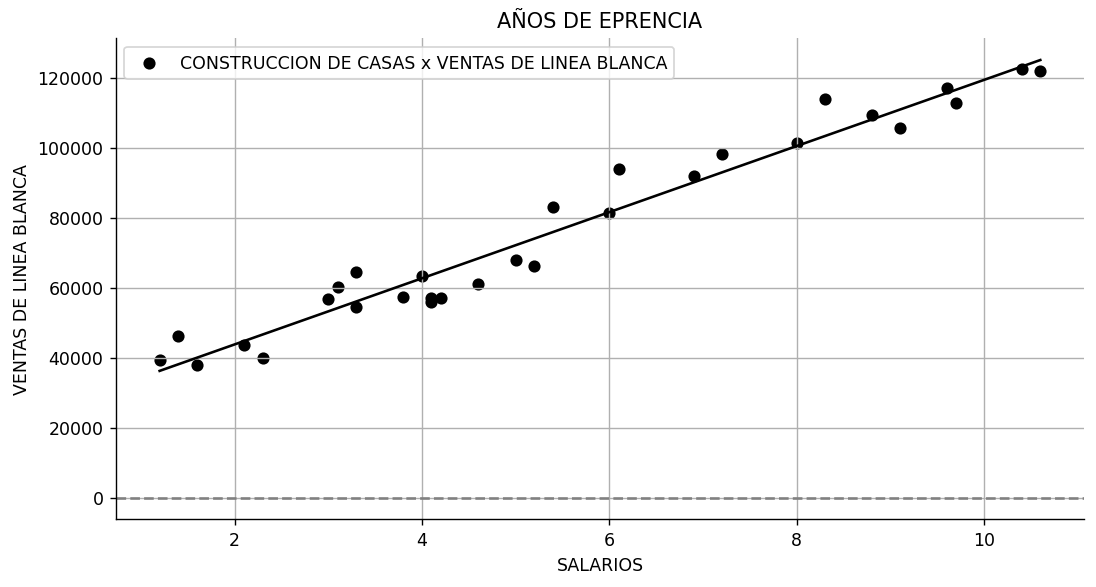

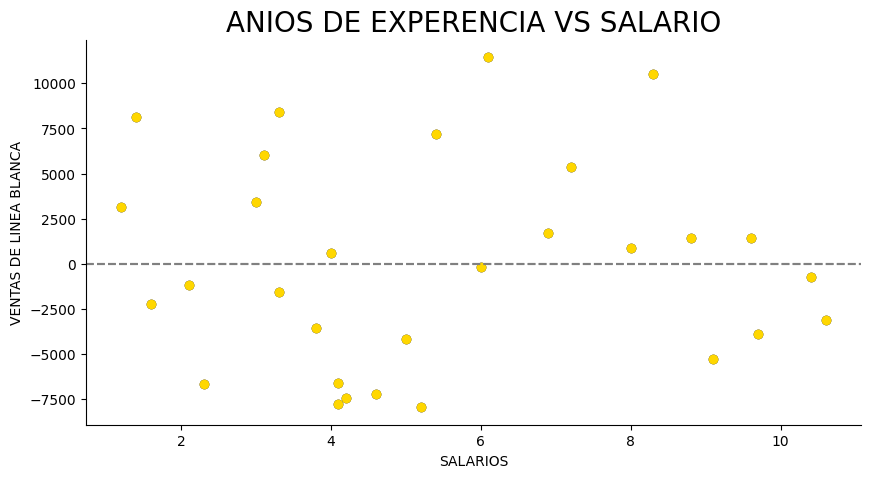

In [9]:
x=df["YearsExperience"]
y=df["Salary"]
df.head(10)
print(df)
print("\n")

#REALIZAR UN DIAGRAMA DE DISPERSION PARA LOS DATOS
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5),dpi=125)
plt.scatter(x,y,
    label="CONSTRUCCION DE CASAS x VENTAS DE LINEA BLANCA",
    color="Black")
plt.title("AÑOS DE EPRENCIA")
plt.xlabel("SALARIOS")
plt.ylabel("VENTAS DE LINEA BLANCA")
plt.axhline(y=0, color="grey", linestyle="--")
plt.legend()
plt.grid()
df.head()
plt.gca().spines[["top","right"]].set_visible(False)

#3.- LOS DATOS SOPORTAN LA SUPOSICION DE LIENALIDAD
#SI

#4.- CALCULAR EL COEFICIENTE DE CORRELACION
from scipy.stats import pearsonr
r,_=pearsonr(x,y)
print( f"COEFICIENTE DE CORRELACION: {r: 0.4f}\n")

#6.- OBTENGA LA RECTA DE REGRESION AJUSTADA Y GRAFICAR SOBRE EL GRAFICO DE
#DISPERSION
import statsmodels.api as sm
x_constante=sm.add_constant(x)
modelo=sm.OLS(y,x_constante).fit()
yc=modelo.predict(x_constante)
plt.plot(x,yc, color="BLACK")

#5.- CALCULE EL COEFICIENTE DE DETERMINACION E INTERPRETE EL RESULTADO
from sklearn.metrics import r2_score
r2=r2_score(x,y)
print( f"COEFICIENTE DE DETERMINACION: {r2: 0.4f} \n")

#7.-OBTENGA UN INTERVALO DE CONFIANZA DEL 95% PARA LA PENDIENTE DE LA RECTA DE
nivel_confianza= 0.95
intervalo_de_confianza=modelo.conf_int(alpha= 1 - nivel_confianza)
intervalo_de_confianza_b1=intervalo_de_confianza.iloc[1]
print(f"INTERVALO DE CONFIANZA DEL PARA b1 ES: {nivel_confianza:0.0%} \n")
print(f"{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f} \n")

#8.- CALCULE LOS RESIDUALES Y TRACE UN NUEVO GRAFICO DE DISPERSION. COMENTE,
# PARECE QUE SE VERIFICAN LOS SUPUESTOS
residuales= modelo.resid
plt.figure(figsize=(10,5),dpi=100)
plt.scatter(x,residuales, color="Black")
plt.title("ANIOS DE EXPERENCIA VS SALARIO" , fontsize = 20 )
plt.xlabel("SALARIOS")
plt.ylabel("VENTAS DE LINEA BLANCA")
plt.axhline(y=0, color="grey", linestyle="--")
plt.scatter(x, residuales,
            label="precio",
            color="gold")
plt.axhline(y=0, color="grey", linestyle="--")
plt.gca().spines[["top","right"]].set_visible(False)

#9.- REALIZAR LA PRUEBA DE SHAPIRO PARA LOS RESIDUALES Y COMENTE EL RESULTADO
from scipy.stats import shapiro
estadistico_shapiro, valor_p_sh = shapiro(residuales)
print("valor_p_sh:", valor_p_sh )
print("\n")
if valor_p_sh<0.05:
  print("Los datos no siguen una distribucion normal")
else:
  print("Los datos siguen una distribucion normal \n")

#10.-REALIZAR LA PRUEBA DE BREUSCHPAGAN PARA LOS RESIDUALES Y COMENTE LOS RESULTADOS
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print("valor_p_bp:", valor_p_bp)
print("\n")
if valor_p_bp<0.05:
  print("Hay heteroscedasticidad")
else:
  print("Hay homosedasticidad \n")

#11.- UTILIZA LA RECTA DE REGRESION PARA INTERPOLAR DOS VALORES Y EXTRAPOLAR UNO
#COMENTA LOS RESULTADOS
print(f"Para x = 5, y = {modelo.predict([1,5])[0]}")
print(f"Para x = 8, y = {modelo.predict([1,8])[0]}")
print(f"Para x = 20 y = {modelo.predict([1,20])[0]}\n")

#12.- REALIZAR TABLA ANOVA E INTERPRETAR EL RESULTADO
from statsmodels.formula.api import ols
modelo_lineal=ols(" YearsExperience~ Salary", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
if valor_p_bp<0.05:
  print("No hay relacion entre X y Y")
else:
  print("Si hay relacion entre X y Y")
tabla_anova

#Soprta la suposicion de linealidad
#Homos
#Normal
#